In [1]:
import geopandas as gp
import geoplot as gplt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp

In [2]:
hail = gp.read_file('hailshape/1955-2018-hail-initpoint.shp')
states = gp.read_file('/home/robert/basemaps/counties/cb_2018_us_county_500k.shp')

### First, we need to determine the number of storms per month that occur in Colorado between 1955 and 2019. We can use this to find the average number of storms per month. For a poisson distribution lambda is equal to mean of the distribution.  

In [3]:
months = {}
for m in range(1,13):
    months[m] = []
years = range(1959, 2019, 1)
for i in years:
    for m in range(1,13):
        t = hail[(hail['st']=='CO') & (hail['yr']==i) & (hail['mo']==m)]
        t = t[t['mag'] > 1.]
        months[m].append(len(t))

### Next we'll just write up some quick functions to represent the Poisson distribution.

In [8]:
def poisson(rate, events, time=1.0):
    nom1 = ((rate*time)**events)
    nom2 = np.exp(-1*rate*time)
    denom = np.math.factorial(events)
    return(nom1*nom2/denom)

def p_range(rate, ran, time=1.0):
    prob = 0
    for i in ran:
        prob += poisson(rate, i, time)
    return prob

### Check our results to see if they make sense. We'll use scipy's Poisson distribution to verify that our local code was written correctly.

In [5]:
m_lamb = {}
for m in range(1,13):
    m_lamb[m] = np.mean(months[m])

In [6]:
print(sp.poisson.pmf(0, m_lamb[7]), poisson(m_lamb[7], 0))

2.684105192073062e-08 2.684105192073062e-08


In [9]:
ran = range(1, 145)
p_range(m_lamb[7], ran)

0.9999999731589478

In [11]:
1-poisson(m_lamb[7], 0)

0.9999999731589481

### Recall that for the gassian distribution the p(20 storms) was ~ 0.016. Let's see how that compares to the possion process. Addtionally for the gaussian distribution the had the value from 0 to 40 at ~0.588

In [12]:
poisson(m_lamb[7], 20)

0.07417944816881525

In [13]:
ran = range(40)
p_range(m_lamb[7], ran)

0.9999974432544358

### Which distribution makes more sense in this situation?

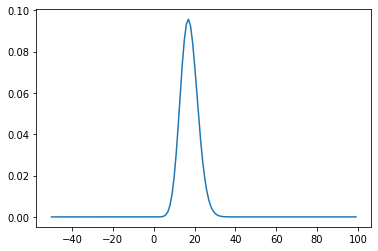

In [14]:
x = range(-50, 100)
plt.plot(x, sp.poisson.pmf(x, m_lamb[7]))

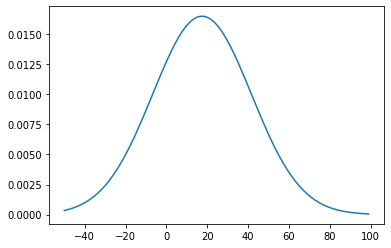

In [15]:
plt.plot(x, sp.norm.pdf(x, 17.43, 24.19))

In [16]:
hist, bins= np.histogram(months[7], bins=20)

(array([29.,  9.,  8.,  4.,  2.,  1.,  1.,  0.,  2.,  1.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   7.05,  14.1 ,  21.15,  28.2 ,  35.25,  42.3 ,  49.35,
         56.4 ,  63.45,  70.5 ,  77.55,  84.6 ,  91.65,  98.7 , 105.75,
        112.8 , 119.85, 126.9 , 133.95, 141.  ]),
 <a list of 20 Patch objects>)

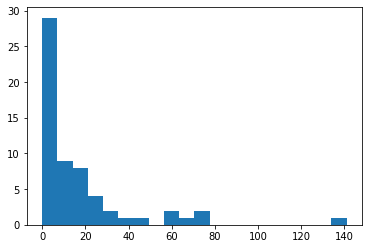

In [18]:
plt.hist(months[7], bins=bins)